In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

SIMULATION_FOLDER = 'C:\\Users\\Admin\\Desktop\\phd\\multivariate_hawkes\\data\\simulations\\multivariate_hawkes\\ETH_USD'

In [ ]:
file.

'orderbook_changes_1712870979890_1712870143.tsv'

In [18]:
path = Path(SIMULATION_FOLDER)
method_simulation_subdirs = [
    d for d in path.rglob("")
    if d.is_dir() and not any(child.is_dir() for child in d.iterdir())
]

dfs_list = []
for method_simulation_subdir in method_simulation_subdirs:
    params = method_simulation_subdir.parts[-4:-1]

    dfs = []
    for file in method_simulation_subdir.glob('orderbook_changes_*.tsv'):
        df = pd.read_csv(file, sep='\t')
        dfs.append(df)
    
    df = pd.concat(dfs)
    df['error'] = (df['real'] - df['predicted']).abs()
    df['method'] = 'lshade' if 'lshade' in str(method_simulation_subdir) else 'greedy'
    df['pair'] = params[1]
    df['param'] = params[2][-3:]

    dfs_list.append(df)

df = pd.concat(dfs_list)
df['method_param'] = df['method'] + '_' + df['param']
df = df.reset_index(drop=True)
df.head()

,real,predicted,error,method,pair,param,method_param
0,0.757,-3.066660,3.823660,lshade,ETH_USD,300,lshade_300
1,1.315,16.040867,14.725867,lshade,ETH_USD,300,lshade_300
2,1.526,17.212209,15.686209,lshade,ETH_USD,300,lshade_300
3,4.325,2.489447,1.835553,lshade,ETH_USD,300,lshade_300
4,5.621,19.631166,14.010166,lshade,ETH_USD,300,lshade_300


<Axes: xlabel='param', ylabel='error'>

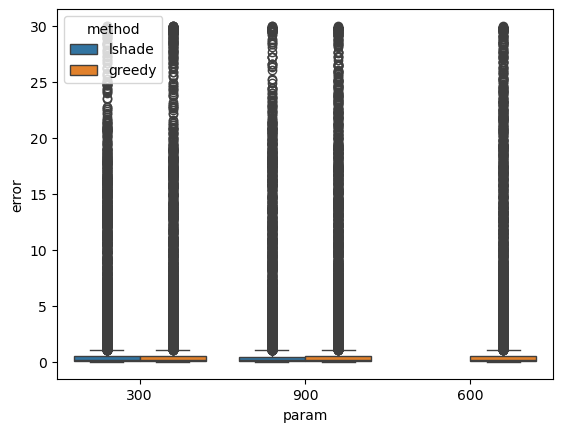

In [19]:
sns.boxplot(x='param', y='error', data=df, hue='method')

<Axes: xlabel='param', ylabel='error'>

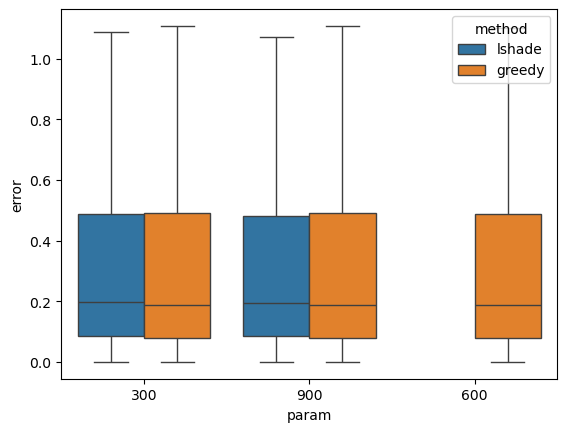

In [20]:
sns.boxplot(x='param', y='error', data=df, hue='method', showfliers=False)